In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.shape

(18207, 60)

In [124]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

# Droping Unwanted Columns

In [125]:
df = df.drop(['ID','Photo','Nationality','Flag','Club','Club Logo','Preferred Foot',
              'Weak Foot','Skill Moves','Work Rate','Body Type','Jersey Number',
              'Loaned From','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve',
              'FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
              'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression',
              'Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
              'SlidingTackle','GKDiving','GKHandling',
              'GKKicking','GKPositioning','GKReflexes'], axis = 1)

In [126]:
df.head()

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,94,94,€110.5M,€565K,5.0,RF,"Jul 1, 2004",2021,5'7,159lbs,€226.5M
1,Cristiano Ronaldo,33,94,94,€77M,€405K,5.0,ST,"Jul 10, 2018",2022,6'2,183lbs,€127.1M
2,Neymar Jr,26,92,93,€118.5M,€290K,5.0,LW,"Aug 3, 2017",2022,5'9,150lbs,€228.1M
3,De Gea,27,91,93,€72M,€260K,4.0,GK,"Jul 1, 2011",2020,6'4,168lbs,€138.6M
4,K. De Bruyne,27,91,92,€102M,€355K,4.0,RCM,"Aug 30, 2015",2023,5'11,154lbs,€196.4M


# Value Column

In [127]:
df['Value'] = df['Value'].apply(lambda x: x.replace('.',''))

In [128]:
df['Value'] = df['Value'].apply(lambda x: x.replace('M','000000'))

In [129]:
df['Value'] = df['Value'].apply(lambda x: x.replace('K','000'))

In [130]:
df['Value'] = [x.strip('€') for x in df['Value']]

In [131]:
df['Value'] = df['Value'].astype(str).astype(int)

In [132]:
df['Value']

0        1105000000
1          77000000
2        1185000000
3          72000000
4         102000000
5          93000000
6          67000000
7          80000000
8          51000000
9          68000000
10         77000000
11        765000000
12         44000000
13         60000000
14         63000000
15         89000000
16        835000000
17         78000000
18         58000000
19        535000000
20        515000000
21         60000000
22         38000000
23        645000000
24         27000000
25         81000000
26        695000000
27        595000000
28        695000000
29         62000000
            ...    
18177         70000
18178         50000
18179         50000
18180         40000
18181         50000
18182         50000
18183             0
18184         40000
18185         50000
18186         60000
18187         40000
18188         60000
18189         60000
18190         60000
18191         50000
18192         50000
18193         50000
18194         50000
18195         60000


# Changes in Wage column

In [133]:
df['Wage'] = df['Wage'].apply(lambda x: x.replace('K','000'))

In [134]:
df['Wage'] = [x.strip('€') for x in df['Wage']]

In [135]:
df['Wage'] = df['Wage'].astype(str).astype(int)

In [136]:
df['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
5        340000
6        420000
7        455000
8        380000
9         94000
10       205000
11       355000
12       125000
13       285000
14       225000
15       205000
16       205000
17       145000
18       240000
19       240000
20       315000
21       200000
22       130000
23       300000
24       215000
25       100000
26       255000
27       285000
28       315000
29       165000
          ...  
18177      1000
18178      1000
18179      1000
18180      1000
18181      1000
18182      1000
18183      1000
18184      1000
18185      1000
18186      1000
18187      1000
18188      1000
18189      1000
18190      1000
18191      1000
18192      1000
18193      1000
18194      1000
18195      1000
18196      1000
18197      1000
18198      1000
18199      1000
18200      1000
18201      1000
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 1820

In [137]:
df.head()

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,94,94,1105000000,565000,5.0,RF,"Jul 1, 2004",2021,5'7,159lbs,€226.5M
1,Cristiano Ronaldo,33,94,94,77000000,405000,5.0,ST,"Jul 10, 2018",2022,6'2,183lbs,€127.1M
2,Neymar Jr,26,92,93,1185000000,290000,5.0,LW,"Aug 3, 2017",2022,5'9,150lbs,€228.1M
3,De Gea,27,91,93,72000000,260000,4.0,GK,"Jul 1, 2011",2020,6'4,168lbs,€138.6M
4,K. De Bruyne,27,91,92,102000000,355000,4.0,RCM,"Aug 30, 2015",2023,5'11,154lbs,€196.4M


# Changes in Joined Column

In [138]:
import datetime
df['Joined'] = pd.to_datetime(df.Joined)
df['joined'] = df['Joined'].dt.strftime("%B %d %Y")
df['Joined'].head()

0   2004-07-01
1   2018-07-10
2   2017-08-03
3   2011-07-01
4   2015-08-30
Name: Joined, dtype: datetime64[ns]

In [139]:
df['Joined']

0       2004-07-01
1       2018-07-10
2       2017-08-03
3       2011-07-01
4       2015-08-30
5       2012-07-01
6       2012-08-01
7       2014-07-11
8       2005-08-01
9       2014-07-16
10      2014-07-01
11      2014-07-17
12      2010-08-04
13      2010-07-14
14      2016-07-16
15      2015-07-01
16      2010-07-01
17      2014-07-28
18      2014-07-01
19      2018-08-09
20      2008-09-01
21      2013-07-16
22      2011-07-01
23      2011-07-28
24      2005-07-01
25      2018-07-01
26      2017-07-01
27      2013-07-11
28             NaT
29      2010-07-01
           ...    
18177   2016-12-06
18178   2018-04-04
18179   2018-07-01
18180   2013-07-01
18181   2017-01-01
18182   2018-09-08
18183   2018-08-17
18184   2017-11-04
18185   2018-02-23
18186   2016-07-11
18187   2017-07-01
18188   2017-07-01
18189   2017-07-01
18190   2018-07-01
18191   2018-07-01
18192   2018-01-01
18193   2018-01-01
18194   2018-07-01
18195   2018-03-16
18196   2017-07-01
18197   2018-10-05
18198   2018

In [140]:
df['Joined'] = df.Joined.replace('NaT','')


In [141]:
df['Joined'] = df['Joined'].astype(str)

In [142]:
df['Joined'] = [x[0:4] for x in df.Joined]

In [143]:
df['Joined'] = df.Joined.replace('NaT',0)


In [144]:
df['Joined'] = df['Joined'].astype(int)

In [145]:
mean = df['Joined'].mean()
df['Joined'] = df.Joined.replace(0,df['Joined'].mean())


In [146]:
df['Joined'].mean()

2001.7889651130267

In [147]:
df['Joined'].value_counts()

2018.00000    6569
2017.00000    4307
2016.00000    2246
1844.46213    1553
2015.00000    1336
2014.00000     818
2013.00000     458
2012.00000     340
2011.00000     201
2010.00000     131
2009.00000      78
2008.00000      53
2007.00000      38
2006.00000      18
2005.00000      17
2003.00000      13
2004.00000      12
2002.00000      10
1998.00000       3
2001.00000       2
2000.00000       2
1999.00000       1
1991.00000       1
Name: Joined, dtype: int64

In [148]:
df['Joined'] = df['Joined'].astype(str)

In [149]:
df['Joined'] = [x[0:4] for x in df.Joined]

In [150]:
df['Joined'].value_counts()

2018    6569
2017    4307
2016    2246
1844    1553
2015    1336
2014     818
2013     458
2012     340
2011     201
2010     131
2009      78
2008      53
2007      38
2006      18
2005      17
2003      13
2004      12
2002      10
1998       3
2000       2
2001       2
1991       1
1999       1
Name: Joined, dtype: int64

In [151]:
df['Joined'] = df['Joined'].astype(int)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null int32
Wage                        18207 non-null int32
International Reputation    18159 non-null float64
Position                    18147 non-null object
Joined                      18207 non-null int32
Contract Valid Until        17918 non-null object
Height                      18159 non-null object
Weight                      18159 non-null object
Release Clause              16643 non-null object
joined                      18207 non-null object
dtypes: float64(1), int32(3), int64(3), object(7)
memory usage: 1.7+ MB


# For Contract Valid Until Column

In [153]:
from datetime import date
import datetime

In [154]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [155]:
df['Contract Valid Until'].value_counts()

2019-01-01    4870
2021-01-01    4360
2020-01-01    4027
2022-01-01    1477
2023-01-01    1053
2019-06-30     931
2018-01-01     886
2018-12-31     144
2019-05-31      60
2024-01-01      23
2020-06-30      14
2019-01-31      13
2025-01-01       7
2019-01-05       6
2019-01-02       6
2019-01-12       5
2019-10-14       5
2019-01-06       4
2019-01-07       3
2019-01-25       3
2019-12-31       3
2019-12-01       2
2026-01-01       2
2020-05-31       2
2018-11-30       2
2019-01-20       1
2019-01-30       1
2019-05-04       1
2019-01-04       1
2019-01-03       1
2019-01-11       1
2020-02-27       1
2019-01-18       1
2019-01-15       1
2019-06-01       1
Name: Contract Valid Until, dtype: int64

In [156]:
df['Contract Valid Until'] =df['Contract Valid Until'].astype(str)

In [157]:
df['Contract Valid Until'] = [x[0:4] for x in df['Contract Valid Until']]

In [158]:
df['Contract Valid Until'].value_counts()

2019    5920
2021    4360
2020    4044
2022    1477
2023    1053
2018    1032
NaT      289
2024      23
2025       7
2026       2
Name: Contract Valid Until, dtype: int64

In [159]:
df['Contract Valid Until'] = df['Contract Valid Until'].replace('NaT',0)

In [160]:
df['Contract Valid Until'].value_counts()

2019    5920
2021    4360
2020    4044
2022    1477
2023    1053
2018    1032
0        289
2024      23
2025       7
2026       2
Name: Contract Valid Until, dtype: int64

In [161]:
df['Contract Valid Until'] = df['Contract Valid Until'].astype(int)

In [162]:
mean = df['Contract Valid Until'].mean()
df['Contract Valid Until'] = df['Contract Valid Until'].replace(0,df['Contract Valid Until'].mean())

In [163]:
df['Contract Valid Until'].value_counts()

2019.000000    5920
2021.000000    4360
2020.000000    4044
2022.000000    1477
2023.000000    1053
2018.000000    1032
1988.080848     289
2024.000000      23
2025.000000       7
2026.000000       2
Name: Contract Valid Until, dtype: int64

In [164]:
df['Contract Valid Until'] = df['Contract Valid Until'].astype(str)

In [165]:
df['Contract Valid Until'] = [x[0:4] for x in df['Contract Valid Until']]

In [166]:
df['Contract Valid Until'].value_counts()

2019    5920
2021    4360
2020    4044
2022    1477
2023    1053
2018    1032
1988     289
2024      23
2025       7
2026       2
Name: Contract Valid Until, dtype: int64

In [167]:
df['Contract Valid Until'] = df['Contract Valid Until'].astype(int)

In [168]:
df['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
5        2020
6        2020
7        2021
8        2020
9        2021
10       2021
11       2022
12       2019
13       2020
14       2023
15       2022
16       2024
17       2023
18       2022
19       2024
20       2023
21       2020
22       2021
23       2021
24       2020
25       2022
26       2023
27       2021
28       2019
29       2022
         ... 
18177    2019
18178    2018
18179    2020
18180    2019
18181    2018
18182    2021
18183    2023
18184    2021
18185    2018
18186    2019
18187    2020
18188    2021
18189    2020
18190    2021
18191    2021
18192    2021
18193    2021
18194    2021
18195    2018
18196    2021
18197    2018
18198    2021
18199    2021
18200    2019
18201    2018
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: int32

# For Weight Column

In [169]:
df['Weight'] = df['Weight'].astype(str)

In [170]:
df['Weight'] = [x[0:3] for x in df.Weight]

In [171]:
df['Weight']

0        159
1        183
2        150
3        168
4        154
5        163
6        146
7        190
8        181
9        192
10       176
11       168
12       172
13       148
14       159
15       165
16       196
17       161
18       187
19       212
20       168
21       170
22       203
23       154
24       187
25       161
26       157
27       185
28       172
29       130
        ... 
18177    163
18178    176
18179    163
18180    172
18181    134
18182    165
18183    190
18184    179
18185    159
18186    174
18187    161
18188    148
18189    165
18190    176
18191    168
18192    165
18193    146
18194    187
18195    141
18196    146
18197    141
18198    154
18199    150
18200    157
18201    168
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18207, dtype: object

In [172]:
df['Weight'] = df['Weight'].astype(float)

In [173]:
mean1 = df['Weight'].mean()
df['Weight'] = df.Weight.fillna(mean1)

In [174]:
df['Weight'].value_counts()

165.000000    1483
154.000000    1439
176.000000    1041
172.000000     987
159.000000     946
161.000000     936
163.000000     901
170.000000     860
168.000000     836
174.000000     705
150.000000     660
157.000000     617
181.000000     584
183.000000     513
179.000000     507
152.000000     506
143.000000     505
187.000000     448
148.000000     435
185.000000     432
146.000000     365
141.000000     322
190.000000     288
194.000000     278
139.000000     206
192.000000     193
137.000000     165
198.000000     156
196.000000     143
132.000000     127
201.000000      93
134.000000      87
203.000000      75
205.000000      60
165.979129      48
207.000000      45
209.000000      34
130.000000      33
128.000000      31
212.000000      23
123.000000      18
126.000000      14
214.000000      11
121.000000      10
216.000000       9
117.000000       6
218.000000       5
119.000000       4
225.000000       3
223.000000       3
236.000000       2
227.000000       2
110.000000  

# Changes for Release Column

In [175]:
df['Release Clause'] = df['Release Clause'].astype(str)

In [176]:
df['Release Clause'] = [x.strip('€') for x in df['Release Clause']]

In [177]:
df['Release Clause'] = df['Release Clause'].str.replace('M','00000').str.replace('K','000')

In [178]:
df['Release Clause'] = df['Release Clause'].str.replace('.','')

In [179]:
df['Release Clause'] = df['Release Clause'].astype(float)

In [180]:
df['Release Clause'] = df['Release Clause'].fillna(df['Release Clause'].median())

In [181]:
df['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
5        172100000.0
6        137400000.0
7         16400000.0
8        104600000.0
9        144500000.0
10       127100000.0
11       156800000.0
12        90200000.0
13        11100000.0
14       121300000.0
15       153500000.0
16       160700000.0
17       165800000.0
18       123300000.0
19       113700000.0
20       105600000.0
21        11100000.0
22        62700000.0
23       119300000.0
24        44600000.0
25       166100000.0
26       137300000.0
27       126400000.0
28         1000000.0
29       105400000.0
            ...     
18177       193000.0
18178        94000.0
18179       119000.0
18180        78000.0
18181       109000.0
18182       101000.0
18183      1000000.0
18184        78000.0
18185        88000.0
18186       167000.0
18187        66000.0
18188       143000.0
18189       125000.0
18190       165000.0
18191       119000.0
18192       119000.0
18193        

In [182]:
df['Release Clause'] = df['Release Clause'].astype(float)

In [183]:
df.head()

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,joined
0,L. Messi,31,94,94,1105000000,565000,5.0,RF,2004,2021,5'7,159.0,226500000.0,July 01 2004
1,Cristiano Ronaldo,33,94,94,77000000,405000,5.0,ST,2018,2022,6'2,183.0,127100000.0,July 10 2018
2,Neymar Jr,26,92,93,1185000000,290000,5.0,LW,2017,2022,5'9,150.0,228100000.0,August 03 2017
3,De Gea,27,91,93,72000000,260000,4.0,GK,2011,2020,6'4,168.0,138600000.0,July 01 2011
4,K. De Bruyne,27,91,92,102000000,355000,4.0,RCM,2015,2023,5'11,154.0,196400000.0,August 30 2015


In [184]:
df = df.drop(['joined'], axis = 1)

In [185]:
df.head()

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,94,94,1105000000,565000,5.0,RF,2004,2021,5'7,159.0,226500000.0
1,Cristiano Ronaldo,33,94,94,77000000,405000,5.0,ST,2018,2022,6'2,183.0,127100000.0
2,Neymar Jr,26,92,93,1185000000,290000,5.0,LW,2017,2022,5'9,150.0,228100000.0
3,De Gea,27,91,93,72000000,260000,4.0,GK,2011,2020,6'4,168.0,138600000.0
4,K. De Bruyne,27,91,92,102000000,355000,4.0,RCM,2015,2023,5'11,154.0,196400000.0


# Changes in Height Column

In [186]:
df['Height'] = df['Height'].astype(str)

In [187]:
df['Height'] = df['Height'].apply(lambda x: x.replace("'",'.'))

In [188]:
df['Height'] = df['Height'].astype(float)

In [189]:
df.head()

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,94,94,1105000000,565000,5.0,RF,2004,2021,5.70,159.0,226500000.0
1,Cristiano Ronaldo,33,94,94,77000000,405000,5.0,ST,2018,2022,6.20,183.0,127100000.0
2,Neymar Jr,26,92,93,1185000000,290000,5.0,LW,2017,2022,5.90,150.0,228100000.0
3,De Gea,27,91,93,72000000,260000,4.0,GK,2011,2020,6.40,168.0,138600000.0
4,K. De Bruyne,27,91,92,102000000,355000,4.0,RCM,2015,2023,5.11,154.0,196400000.0


# 1.	Plot the distribution of Overall rating for all players

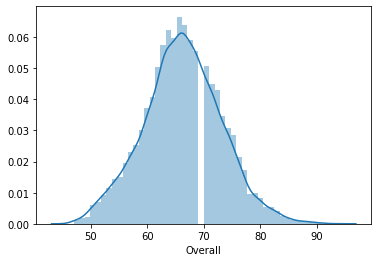

In [190]:
sns.distplot(df['Overall'], hist = True)

# 2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [191]:
list1 = ['Overall', 'Height', 'Value', 'Wage', 'International Reputation', 'Weight', 'Release Clause']

In [192]:
import warnings
warnings.filterwarnings('ignore')

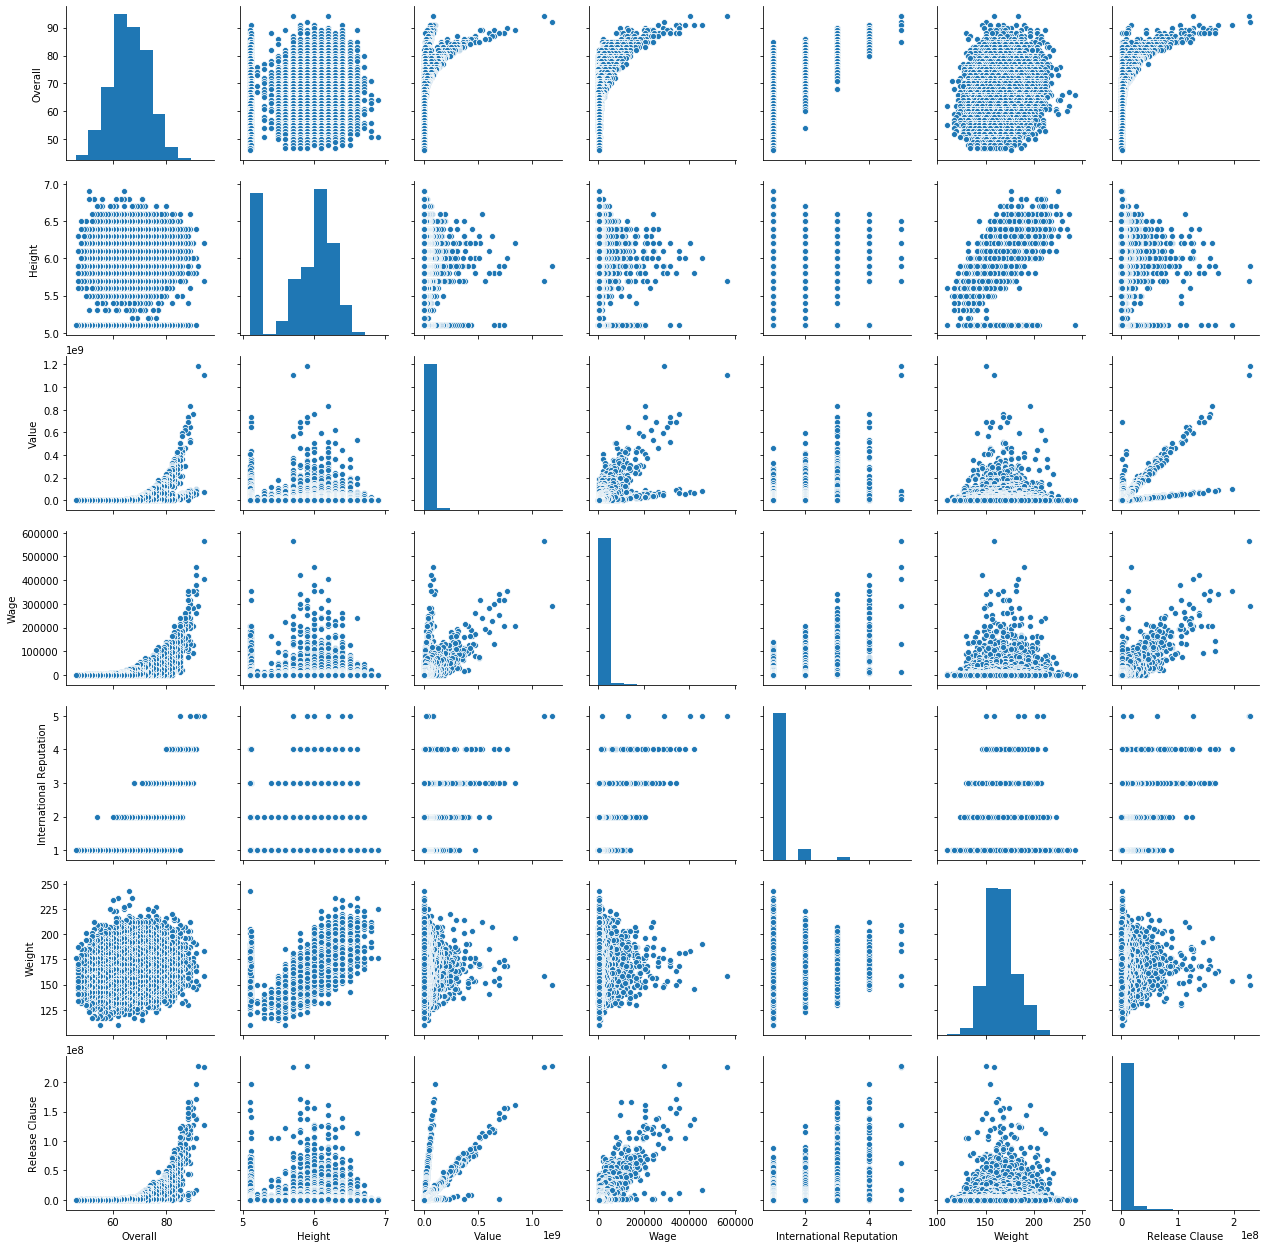

In [193]:
sns.pairplot(df[list1])

# 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.



In [194]:
list2 = ['Overall','Contract Valid Until']

In [195]:
df[list2].head()

,Overall,Contract Valid Until
0,94,2021
1,94,2022
2,92,2022
3,91,2020
4,91,2023


In [196]:
a = df[df['Contract Valid Until']==2020]

In [197]:
a.sort_values(by='Overall', ascending=False, axis = 0).head(20)

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
3,De Gea,27,91,93,72000000,260000,4.0,GK,2011,2020,6.40,168.0,138600000.0
6,L. Modrić,32,91,91,67000000,420000,4.0,RCM,2012,2020,5.80,146.0,137400000.0
8,Sergio Ramos,32,91,91,51000000,380000,4.0,RCB,2005,2020,6.00,181.0,104600000.0
5,E. Hazard,27,91,91,93000000,340000,4.0,LF,2012,2020,5.80,163.0,172100000.0
13,David Silva,32,90,90,60000000,285000,4.0,LCM,2010,2020,5.80,148.0,11100000.0
21,E. Cavani,31,89,89,60000000,200000,4.0,LS,2013,2020,6.10,170.0,11100000.0
24,G. Chiellini,33,89,89,27000000,215000,4.0,LCB,2005,2020,6.20,187.0,44600000.0
31,C. Eriksen,26,88,91,735000000,205000,3.0,CAM,2013,2020,5.11,168.0,141500000.0
39,Thiago Silva,33,88,88,24000000,165000,4.0,RCB,2012,2020,6.00,181.0,44400000.0
50,D. Mertens,31,87,87,45000000,135000,3.0,RF,2013,2020,5.70,134.0,76500000.0


# a)	What would the average wage for this set of players be?


In [198]:
x = a['Wage'].mean()
print(x)

9347.922848664688


# b)	What is the average age?


In [199]:
y = a['Age'].mean()
print(y)

25.20919881305638


# c)	Is there a correlation between the Overall rating and Value for these players?

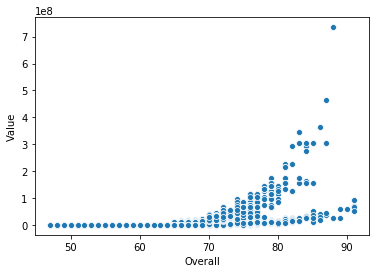

In [200]:
sns.scatterplot(x='Overall', y ='Value', data = a)

In [205]:
b = ['Overall','Value']
a[b].corr()

,Overall,Value
Overall,1.000000,0.535899
Value,0.535899,1.000000


# 4.	Generate tables containing the top 5 players by Overall rating for each unique position.


In [202]:
len(df.Position.value_counts())

27

In [4]:
g = df.groupby(["Position"]).apply(lambda x: x.sort_values(["Overall"], ascending = False)).reset_index(drop=True)
g.groupby('Position').head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M
1,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,€141.5M
2,201942,Roberto Firmino,26,https://cdn.sofifa.org/players/4/19/201942.png,Brazil,https://cdn.sofifa.org/flags/54.png,86,87,Liverpool,https://cdn.sofifa.org/teams/2/light/9.png,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,€104.7M
3,189596,T. Müller,28,https://cdn.sofifa.org/players/4/19/189596.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,€74.3M
4,176635,M. Özil,29,https://cdn.sofifa.org/players/4/19/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,86,86,Arsenal,https://cdn.sofifa.org/teams/2/light/1.png,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,€82.7M
958,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
959,205600,S. Umtiti,24,https://cdn.sofifa.org/players/4/19/205600.png,France,https://cdn.sofifa.org/flags/18.png,87,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,€121.1M
960,177509,M. Benatia,31,https://cdn.sofifa.org/players/4/19/177509.png,Morocco,https://cdn.sofifa.org/flags/129.png,86,86,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,€49.5M
961,192366,N. Otamendi,30,https://cdn.sofifa.org/players/4/19/192366.png,Argentina,https://cdn.sofifa.org/flags/52.png,85,85,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,€52.7M
962,171919,Naldo,35,https://cdn.sofifa.org/players/4/19/171919.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,FC Schalke 04,https://cdn.sofifa.org/teams/2/light/34.png,...,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,€15.3M


# a)	Are there any players appearing in more than one Table. Please point out such players.


In [6]:
g.Name.value_counts()

J. Rodríguez         11
Paulinho              8
R. Williams           7
J. Williams           7
J. Gómez              6
J. Hernández          6
J. Valencia           6
Felipe                6
J. Murillo            5
L. Rodríguez          5
M. Smith              5
J. Torres             5
D. Williams           5
Danilo                5
L. López              5
M. Pedersen           5
A. Traoré             5
M. Gómez              5
J. Jones              5
J. Pérez              5
J. Martínez           5
A. González           4
A. Ba                 4
J. Murphy             4
R. Taylor             4
D. Schmidt            4
J. García             4
J. Brown              4
J. Mosquera           4
J. Medina             4
                     ..
S. Chernik            1
M. Ngadeu-Ngadjui     1
D. Peitz              1
Shen Shuaishuai       1
S. Kurt               1
J. Wallens            1
G. Paquiez            1
T. Ince               1
M. Solheim            1
Luis Muñoz            1
R. Noya         

# b)	What is the average wage one can expect to pay for the top 5 in every position?


In [204]:
g['Wage'].mean()

9759.023530060065